In [1]:
import sys
sys.path.append("..")
from utils.dataset import FerDataset
from utils.resnet import *

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = FerDataset(base_path='/Users/lennard/data/project/fer',
                     data='ferplus',
                     mode='train',
                     label='ferplus_votes')
dataloader = DataLoader(dataset, batch_size=24, shuffle=True, num_workers=0)

net = ResNet(BasicBlock, [2, 2, 2, 2], num_classes=dataset.n_classes, adaptive=True)

log_softmax = nn.LogSoftmax(dim=-1)
criterion = nn.KLDivLoss(size_average=False)
optimizer = torch.optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

/Users/lennard/miniconda3/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [3]:
x_batch, y_batch = next(iter(dataloader))
losses = []
for i in range(1000):
    optimizer.zero_grad()
    logits = net(x_batch)
    log_probs = log_softmax(logits)
    loss = criterion(log_probs, y_batch)
    losses.append(float(loss))
    loss.backward()
    optimizer.step()
    print(i, end='\r')

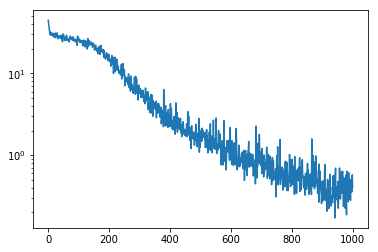

In [4]:
plt.plot(losses)
plt.yscale('log')